# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Read the worksheet carefully before doing the exercises.

# Introduction

In this worksheet we’ll look at the extraction of information from experimental data. This is important for PX2338 (Obs tech) and your work in the year 2 lab as well as your year 3/4 project.

We’ll first examine fitting of data with a straight line and then move on to more complicated functions.

## Fitting with a straight line

Let’s see how to fit data with a straight line, taking advantage of functions. **Go back to week 2 - Functions** and make sure you understand it. In particular, from week2 exercise 3 you fitted a straight line to data. Your code should look something like the code below. You will already have defined a function called linfit, which works along these lines:

slope:  99.0595238095238 +/- 0.9295121405070327
intercept:  6.166666666666632 +/- 3.8884282607017973



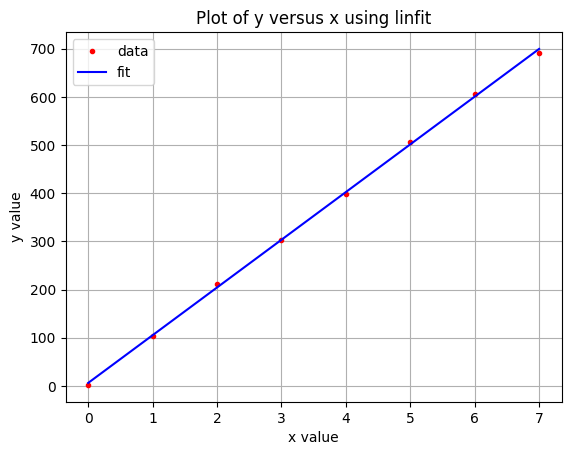

In [2]:
# put some test data into arrays ...
x_data = np.array([ 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0 ])
y_data = np.array([ 2, 104, 212, 302, 398, 507, 606, 692 ])

# define a nice, self-contained fitting routine.
def linfit(x, y):
    '''
    Takes input arrays x an y and performs a linear least squares fit.
    Returns estimated slope, error is slope,
    intercept, error in intercept.
    '''
    # do LSF using method described in PX1224 week 4 ...
    p_coeff, residuals, _, _, _ = np.polyfit(x, y, 1, full=True)
    # Note: residuals is returned as an array with one element.
    # residuals[0] is the value of this element
    n = len(x)
    D = sum(x**2) - 1./n * sum(x)**2
    x_bar = np.mean(x)
    dm_squared = 1./(n-2)*residuals[0]/D
    dc_squared = 1./(n-2)*(D/n + x_bar**2)*residuals[0]/D
    dm = np.sqrt(dm_squared)
    dc = np.sqrt(dc_squared)
    return p_coeff[0], dm, p_coeff[1], dc

# Calling the fitting function:
m, dm, c, dc = linfit(x_data, y_data)
print ('slope: ', m, '+/-', dm)
print ('intercept: ', c, '+/-', dc)
print ()

# Now for plotting purposes, we define a linear function
def linear(x, m, c):
    return m*x + c

# alternative method to define the linear function
# (effectively, it's identical to the other method
# *p means just a list of values)
def linear(x, *p):
    return p[0]*x + p[1]

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
x_plot = np.linspace(min(x_data),max(x_data),num=100)
plt.plot(x_plot, linear(x_plot, m, c), 'b-',label='fit')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using linfit')
plt.legend()
plt.grid ()

The above thus implements a linear least squares fit using polyfit. **Make sure that your linfit routine works ok**. You can use this whenever you have data in the year 2 lab that you need to fit to a straight line.

## Fitting with a more general function
You can of course easily extend this and fit polynomials using `polyfit`, but what about more complicated functions? We’ll take advantage of the `scipy.optimize` routine `curve_fit` to fit directly just about any function we wish.
The general way the curve fitting function is used is like this

```python
popt, pcov = curve_fit(f=func, xdata=x, ydata=y, p0=init_guess, bounds=([a_min, b_min], [a_max, b_max]))
```

Here, `func` is just the name of a function that you have defined, `x` and `y` are equal length data arrays, `init_guess` is an array of initial values (somewhere near to the final values you expect). (They don’t have to be called func, x, y and init_guess since those names are up to you in your program. But the `f=` parts and so on must be written as above.) The term `bounds` is to constrain the range of the parameters fitted and can usually be left out.

There are other keywords which you can explore in Jupyter notebook’s help (Cmd/Ctrl+Space, Option+Esc or Tab for autocomplete, Cmd/Ctrl+Shift+Space for Docstring, depending on your settings and shortcuts. Cmd for Macs, Ctrl for Windows). Or go to this [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

Actually, the above form can be simplified slightly to

```python
# recommended form to use
popt, pcov = curve_fit(func, x, y, init_guess, bounds=([a_min, b_min], [a_max, b_max]))
```

and you may not need the `bounds` key word.

An example to show the usage is below. Here, we define a quadratic function as an illustration and check we get sensible result.

In [3]:
def quadratic(x, *p):
    return p[0]*x**2 + p[1]*x + p[2]

Do not run `curve_fit()` right away ! First make sure your fitting function makes sense. This is best done by plotting it with some guess parameters against the data:

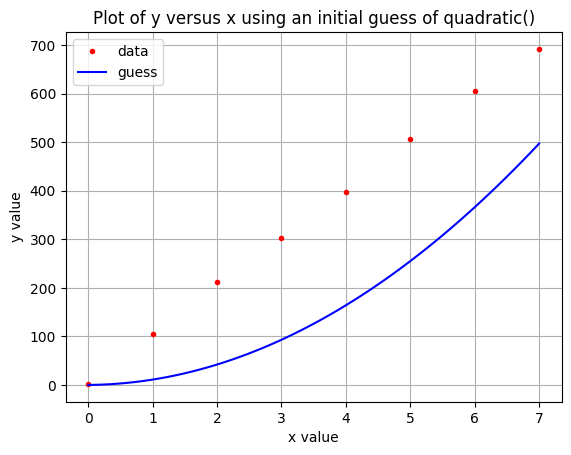

In [4]:
x_plot = np.linspace(min(x_data),max(x_data),num=100)

# compute a guess curve by creating an array y_guess of data points.
p_guess = np.array([10.0, 1.0, 0.0]) # initial guess
y_guess = quadratic(x_plot, *p_guess) # values come from an educated guess looking at the data.

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
plt.plot(x_plot, y_guess, 'b-',label='guess')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using an initial guess of quadratic()')
plt.legend()
plt.grid ()

In [5]:
# now do curve fit. We can use the initial guess from before
# we must pass the #name# of the function ...
popt, pcov = curve_fit(quadratic, x_data, y_data, p_guess) # do fit

A few things to note:
We pass to the `curve_fit` routine the _name_ of the function we are fitting, which in this example is the `quadratic` function defined earlier.
The `x_data` and `y_data` arrays are passed in, as well as an initial guess of the variables (which is not that crucial in this case, **but can be critical in some cases**).
The optimised values are returned in the array `popt`, and information on the goodness of fit is returned in the array `pcov`.
Thus the error in `popt[0]` can be found as `sqrt(pcov.diagonal()[0])` and likewise for the other optimised values.
Once the fit is done, you can use the results - printing out the fitted coefficients and the errors for example, or plotting the data and the fitted curve.

a:  -0.5297619047618962 +/- 0.4506310572133935
b:  102.76785714285708 +/- 3.280644647901002
c:  2.4583333333333925 +/- 4.9158055523617366



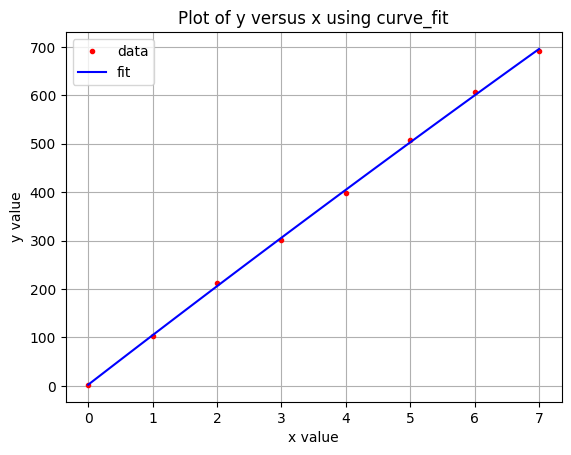

In [6]:
# now do curve fit. We can use the initial guess from before
# we must pass the #name# of the function ...
popt, pcov = curve_fit(quadratic, x_data, y_data, p_guess) # do fit

print ('a: ', popt[0], '+/-', np.sqrt(pcov.diagonal()[0]))
print ('b: ', popt[1], '+/-', np.sqrt(pcov.diagonal()[1]))
print ('c: ', popt[2], '+/-', np.sqrt(pcov.diagonal()[2]))
print ()

x_plot = np.linspace(min(x_data),max(x_data),num=100)

# find fitted curve by creating an array yfit of data points ...
yfit = quadratic(x_plot, *popt)

# plot data
plt.plot(x_data, y_data, 'r.',label='data')
# plot fit
plt.plot(x_plot, yfit, 'b-',label='fit')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Plot of y versus x using curve_fit')
plt.legend()
plt.grid ()

Note: the method we’ve used to pass the calculated coefficients to the linear function for plotting `quadratic(x, *popt)` is an alternative to `quadratic(x, popt[0], popt[1], popt[2])` with the same result, but this new notation saves a lot of typing if we have a function of many parameters.

Note2: if there are not many data points it is better (as done in week 2) to set up a new more appropriate array of x values (here called `x_plot`) so that you get a nice smooth curve.

Do the values found for the coefficients make sense to you? What about the errors compared to the errors when using the simpler linear fit?

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets.
**Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

**Note**: "fitting" does include providing the error measurements. E.g. the answer is not $a=100$ but $a=100^+_-1$.

## Exercise 0

[0] See the video on LearningCentral about fitting a Power Law to the Black Holes mass distribution.

## Exercise 1
[2] Use the above ideas to repeat a _linear_ fit using the `curve_fit` routine (not a _quadratic_ as in the example in the introduction). Confirm, by using your linfit function, that you get the same result as before.

 - In this code i make reference to a youtube video that helped to expalin the concerpts so if things look funny its becausr of that. the video is "curve fitting in python (2022)" by MR P Solver.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

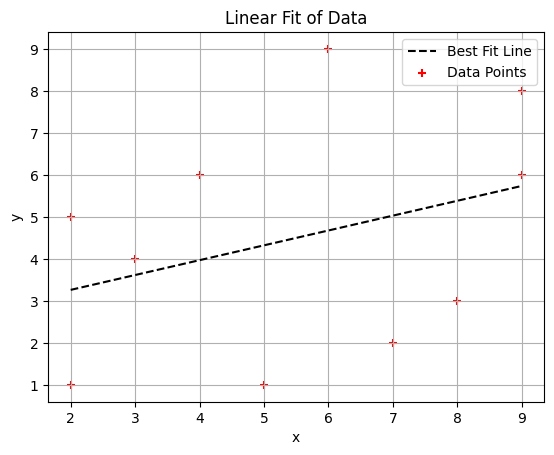

Slope (m): 0.35 +/- 0.11
Intercept (c): 2.56 +/- 0.89


In [8]:
#start with general data from week 2
def linfit(x, y):

    x = np.array(x) #this is then crrating the arrays and things for the x and y
    y = np.array(y)

    n = len(x) #number of data points
    sum_x = np.sum(x) #sum of all the x vaules
    sum_y = np.sum(y) #sum of all the y values
    sum_x2 = np.sum(x**2) #sum of the squares of all the x values
    sum_xy = np.sum(x * y) #sum of all the square of the y values

    delta = n * sum_x2 - sum_x**2  #this is the delta function that is needed to later find the slope of the and the intercept

    m = (n * sum_xy - sum_x * sum_y) / delta #this is the equaiton for the slope of the line
    c = (sum_y * sum_x2 - sum_x * sum_xy) / delta #this is the eqiation for the intercept

    # Calculate errors this is all taken from week 4 work in year 1
    residuals = y - (m * x + c)
    residuals_sum_sq = np.sum(residuals**2)
    dm_sqr = 1/(n-2)*residuals_sum_sq/delta
    dc_sqr = 1/(n-2)*(sum_x2/n + (sum_x/n)**2)*residuals_sum_sq/delta

    dm = np.sqrt(dm_sqr) #stuff from last years code that i copied and cant rememer its a maths thing
    dc = np.sqrt(dc_sqr)

    return m, dm, c, dc

#cant lie dont know whats going on here!
#generate data
xdata_ = [3,5,2,4,7,9,9,6,2,8]
ydata_ = [4,1,5,6,2,8,6,9,1,3] # the data is the same lenght which is good

# Use the linfit function to get the slope, intercept, and their errors
m, dm, c, dc = linfit(xdata_, ydata_)

# Create a polynomial
ploy1d_ = np.poly1d([m, c])
x = np.linspace(min(xdata_), max(xdata_), 100)

# Plot the original data best-fit line and then editit ti be good or look nice
plt.plot(x, ploy1d_(x), "k--", linewidth = 1.5, label='Best Fit Line')
plt.scatter(xdata_, ydata_, color = "red", marker = "+", label = "Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Fit of Data")
plt.legend()
plt.grid()
plt.show()

# Print the results from linfit for the errors and things while only generating them to a specific decimal
print(f"Slope (m): {m:.2f} +/- {dm:.2f}")
print(f"Intercept (c): {c:.2f} +/- {dc:.2f}")

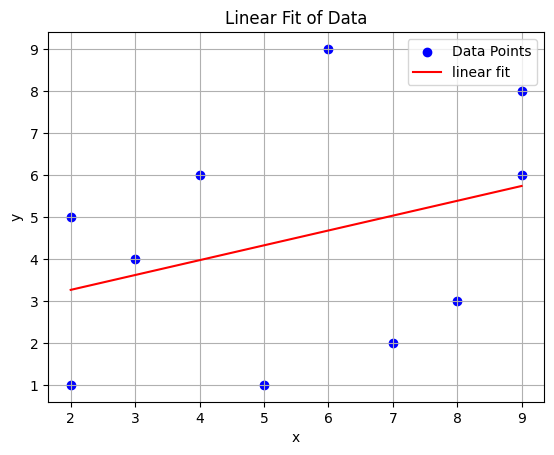

the slope of the line is:0.35
the intercept of the line is:2.56


In [9]:
def linear_fit(x, m, c):
    return m * x + c
initial_guess = [m, c] # Use the results from linfit as initial guess
popt, pcov = curve_fit(linear_fit, xdata_, ydata_, initial_guess)

m_opt, c_opt= popt
x_model = np.linspace(min(xdata_), max(xdata_), 100)
y_model = linear_fit(x_model, m_opt, c_opt)

plt.scatter(xdata_, ydata_ ,color = "b", label = "Data Points" )
plt.plot(x_model, y_model, 'r-', label = "linear fit")
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit of Data')
plt.legend()
plt.show()
print(f"the slope of the line is:{m_opt:.2f}")
print(f"the intercept of the line is:{c_opt:.2f}")

In [10]:
#add quad if needed

## Exercise 2
The data file `XRD_data_Mo_anode.csv`:

In [12]:
! wget -q https://raw.githubusercontent.com/PX2134/data/master/week4/XRD_data_Mo_anode.csv

contains X-ray diffraction data from a molybdenum anode source, obtained using a NaCl crystal. It shows two features, the K-alpha and K-beta (in the data one can see 3 orders – the 4th is present but weak) on top of a Brehmstrahlung (braking radiation) background. The columns are angle in degrees and intensity (measured as counts per second).

1) [3] Read in the raw data points and plot a graph. Estimate **by eye** and make a note of the rough positions, widths and intensitys of the **first** two **main** peaks in first order (highest peaks), around angles of 6 and 7 degrees. Create a single data array that include the angle and count values from around those two peaks. For instance, to only have the data between angle of 1 and 30 you could do:

    ```python
    angles_selected=angles_full_data[(angles_full_datat>=1) & (angles_full_data<=30)]
    counts_selected=counts_full_data[(angles_full_datat>=1) & (angles_full_data<=30)]
    ```
    
    (1 and 30 are not the right values, you need to look at the plot, and make surer you include all of both peaks, but minimise any other features such as higher order peaks or drop-offs).

2) [2] The peaks can be approximated as Gaussian in shape, i.e.: $$G(x;I,\mu,\sigma)=I\frac{1}{\sigma\sqrt{2\pi}}\exp \left(-\frac{(x-\mu)^2}{2\sigma^2} \right)$$ Define (in a similar way you did for the linear fitting) a Gaussian function, which you will use for fitting the data:

    ```python
    Gau(x, intensity, mu, sigma)
    ```

    Note that this Gaussian is normalised to have an area under the curve of intensity (I).

3) [2] Now use `curve_fit()` to try fitting a Gaussian to the highest peak in the data you selected containing those first two peaks near 6 and 7. and plot the result. Remember to first plot your guess !

4) [3] Repeat, but allowing for a constant background offset to improve the fit. Hint: Do this by defining a fitting function comprising a constant term plus a Gaussian, say `Gau_background(x, intensity, mu, sigma, bckg)`. (You can call the `Gau()` function from within `Gau_background()`. You now have four fitting parameters instead of three.)  
  
5) [4] Repeat, but allowing for a linear background to improve the fit. (This requires a function with an extra fitting parameter.)

6) [4] Repeat, but allowing not only for a linear background to improve the fit, but also trying to fit the other peak together with the main one.

Notes:

  - Always plot your fitting function with some guesses first.
  - If the error on all the parameters is very large, in general it means `curve_fit()` did not really manage to fit anything, don't use those values.
  - Remember parameters are (by default) unbounded floats, e.g. if you try to fit a Gaussian at ~6.8, `curve_fit()` will hapilly try a negative intensity, e.g. fit a dip instead of a peak.
  - When using bounds, careful with railing ! If the errors or values are equal (or nearly equal) to the bounds, the fit is not reliable and depends on the provided bounds.
  - When fitting both signal and background, you can also try subtracting the background fit to the data.


In [12]:
#read in the data

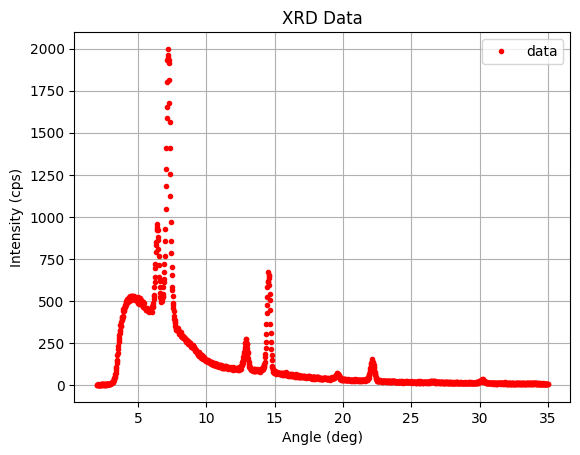

Intensity: 2444.41 +/- 201.35
Mu : 6.9004 +/- 0.0855
Sigma : 1.0498 +/- 0.1078


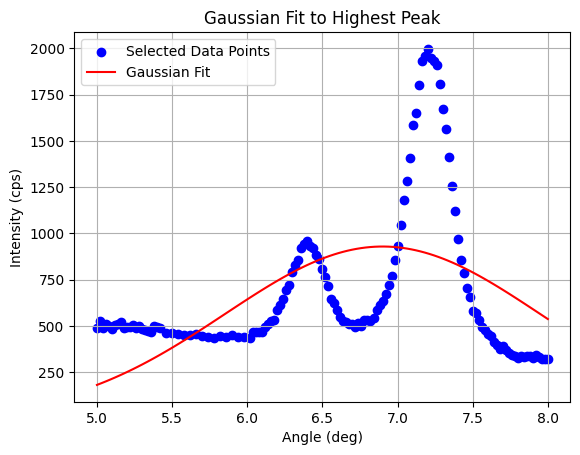

[2.44441282e+03 6.90041620e+00 1.04979282e+00]


In [13]:
#have to open and read the data
file = "XRD_data_Mo_anode.csv"
open_file = np.loadtxt(file, delimiter=",", skiprows=1) # Changed 'open' to 'open_file' to avoid shadowing built-in function
angles_full_data = open_file[:, 0]
counts_full_data = open_file[:, 1]

#then have to plot this
plt.plot(angles_full_data, counts_full_data, 'r.', label='data')
plt.xlabel('Angle (deg)')
plt.ylabel('Intensity (cps)')
plt.title('XRD Data')
plt.legend()
plt.grid()
plt.show()

#then take note of roughly where the peaks are = 6 and then at 7.5??
#copy past from the question
angles_selected = angles_full_data [(angles_full_data>=5) & (angles_full_data<=8)]
counts_selected = counts_full_data [(angles_full_data>=5) & (angles_full_data<=8)]

#then have to do the guass things

# Define them function
def Gau(x, intensity, mu, sigma):
    return intensity * (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu)**2) / (2 * sigma**2))

#make up points based off the graph and see what happens
initial_intensity = np.max(counts_selected)
initial_mu = 6   #peak?
initial_sigma = 1 #idk

initial_guess = [initial_intensity, initial_mu, initial_sigma] # hav eto set up a guess foe curvefit
#from the video
popt, pcov = curve_fit(Gau, angles_selected, counts_selected, initial_guess)
intensity_opt, mu_opt, sigma_opt = popt
errors = np.sqrt(np.diag(pcov)) # errors
error_intensity, error_mu, error_sigma = errors #this reprtes this for all the insvidual errors

# print the errors
print(f"Intensity: {intensity_opt:.2f} +/- {error_intensity:.2f}")
print(f"Mu : {mu_opt:.4f} +/- {error_mu:.4f}")
print(f"Sigma : {sigma_opt:.4f} +/- {error_sigma:.4f}")

#plotting!!!!
#from the youtube video
x_model = np.linspace(min(angles_selected), max(angles_selected), 100)
y_model = Gau(x_model, intensity_opt, mu_opt, sigma_opt)

# Plot....
plt.scatter(angles_selected, counts_selected, color="b", label="Selected Data Points") # Use scatter for data points
plt.plot(x_model, y_model, 'r-', label="Gaussian Fit") # Use plot for the smooth fitted curve
plt.grid()
plt.xlabel('Angle (deg)')
plt.ylabel('Intensity (cps)')
plt.title('Gaussian Fit to Highest Peak')
plt.legend()
plt.show()
#hope this is right
print(popt) #for tim

Intensity: 476.92 +/- 18.33
Mu : 7.2064 +/- 0.0049
Sigma : 0.1282 +/- 0.0052


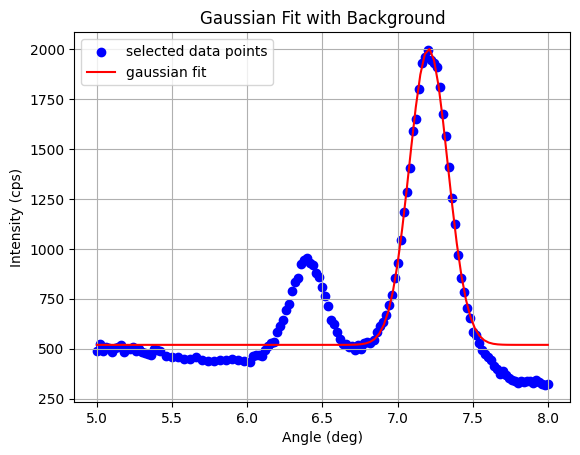

In [15]:
#what do we do just copy and past and adjust???
def Gau_background(x, intensity, mu, sigma, background):
    return Gau(x, intensity, mu, sigma) + background

#have to make up a guess?
inital_background = 0
initial_guess1 = [initial_intensity, initial_mu, initial_sigma, inital_background]

#from video
popt, pcov = curve_fit(Gau_background, angles_selected, counts_selected, initial_guess1)
intensity_opt, mu_opt, sigma_opt, background_opt = popt
errors = np.sqrt(np.diag(pcov)) #errors lets go!
error_intensity_back, error_mu_back, error_sigma_back, error_back = errors #for all errors
#hope this is correct
#print errors
print(f"Intensity: {intensity_opt:.2f} +/- {error_intensity_back:.2f}")
print(f"Mu : {mu_opt:.4f} +/- {error_mu_back:.4f}")
print(f"Sigma : {sigma_opt:.4f} +/- {error_sigma_back:.4f}")

#plotting
x_model1 = np.linspace(min(angles_selected), max(angles_selected), 100)
y_model1 = Gau_background(x_model1, intensity_opt, mu_opt, sigma_opt, background_opt)

#plot
plt.scatter(angles_selected, counts_selected, color = "b", label = "selected data points")
plt.plot(x_model1, y_model1, 'r-', label = "gaussian fit")
plt.grid()
plt.xlabel('Angle (deg)')
plt.ylabel('Intensity (cps)')
plt.title('Gaussian Fit with Background')
plt.legend()
plt.show()

In [15]:
#what does 5 and 6 mean??????? why do we have to repeate it so amny times adn what makes it different.

Intensity: 501.40 +/- 20.05
Mu : 7.2076 +/- 0.0048
Sigma : 0.1324 +/- 0.0053
Linear background slope (m): -43.0896 +/- 14.3048
Linear background intercept (c): 793.92 +/- 92.05


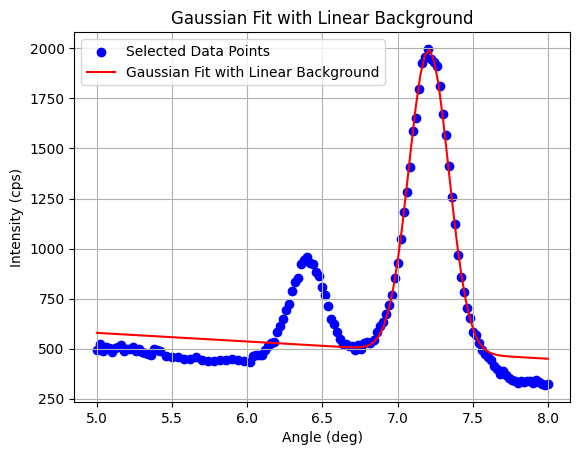

In [18]:
def Gau_linear_background(x, intensity, mu, sigma, m, c):
    return Gau(x, intensity, mu, sigma) + m*x + c
#initla guess
initial_guess_linear = [initial_intensity, initial_mu, initial_sigma, 0, counts_selected[0]]

# youtube
popt_linear, pcov_linear = curve_fit(Gau_linear_background, angles_selected, counts_selected, initial_guess_linear)

# erorors
intensity_opt_linear, mu_opt_linear, sigma_opt_linear, m_opt_linear, c_opt_linear = popt_linear
errors_linear = np.sqrt(np.diag(pcov_linear))
error_intensity_linear, error_mu_linear, error_sigma_linear, error_m_linear, error_c_linear = errors_linear

# Print the results
print(f"Intensity: {intensity_opt_linear:.2f} +/- {error_intensity_linear:.2f}")
print(f"Mu : {mu_opt_linear:.4f} +/- {error_mu_linear:.4f}")
print(f"Sigma : {sigma_opt_linear:.4f} +/- {error_sigma_linear:.4f}")
print(f"Linear background slope (m): {m_opt_linear:.4f} +/- {error_m_linear:.4f}")
print(f"Linear background intercept (c): {c_opt_linear:.2f} +/- {error_c_linear:.2f}")


# Plotting the results
x_model_linear = np.linspace(min(angles_selected), max(angles_selected), 100)
y_model_linear = Gau_linear_background(x_model_linear, intensity_opt_linear, mu_opt_linear, sigma_opt_linear, m_opt_linear, c_opt_linear)

plt.scatter(angles_selected, counts_selected, color="b", label="Selected Data Points")
plt.plot(x_model_linear, y_model_linear, 'r-', label="Gaussian Fit with Linear Background")
plt.grid()
plt.xlabel('Angle (deg)')
plt.ylabel('Intensity (cps)')
plt.title('Gaussian Fit with Linear Background')
plt.legend()
plt.show()

--- Peak 1 ---
Intensity: 565.91 +/- 5.41
Mu : 7.2074 +/- 0.0011
Sigma : 0.1439 +/- 0.0013
--- Peak 2 ---
Intensity: 161.75 +/- 4.55
Mu : 6.4097 +/- 0.0035
Sigma : 0.1308 +/- 0.0037
--- Linear Background ---
Linear background slope (m): -48.6305 +/- 3.4545
Linear background intercept (c): 747.27 +/- 22.15


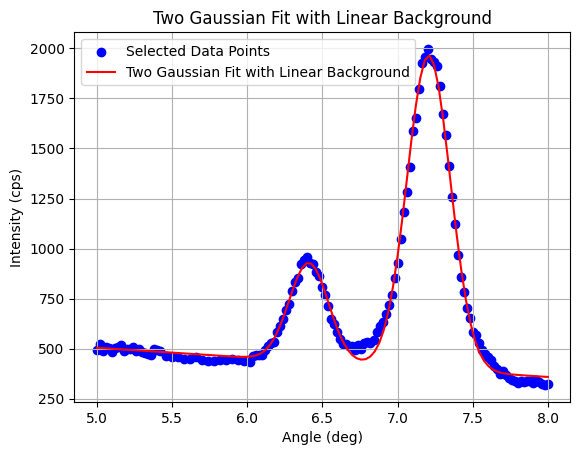

In [23]:
# Define a function with two Gaussian peaks and a linear background
def two_gaussians_linear_background(x, intensity1, mu1, sigma1, intensity2, mu2, sigma2, m, c):
    # This function is a sum of two Gaussian peaks and a linear background
    return Gau(x, intensity1, mu1, sigma1) + Gau(x, intensity2, mu2, sigma2) + m*x + c

# Make an initial guess for the parameters of both peaks and the linear background.
# Refined initial guesses based on visual inspection of the plot
initial_intensity1 = 500  # Estimated intensity of the first peak
initial_mu1 = 7.2 # Estimated center of the first peak
initial_sigma1 = 0.15 # Estimated width of the first peak

initial_intensity2 = 1500 # Estimated intensity of the second peak (higher peak)
initial_mu2 = 6.9   # Estimated center of the second peak (around 6.9 degrees)
initial_sigma2 = 0.1 # Estimated width of the second peak

# Estimate initial values for the linear background from the edges of the selected data
# Using the first and last points of the selected data to estimate the slope and intercept
m_guess = (counts_selected[-1] - counts_selected[0]) / (angles_selected[-1] - angles_selected[0])
c_guess = counts_selected[0] - m_guess * angles_selected[0]


# Combine the initial guesses for both peaks and the linear background
initial_guess_two_peaks = [
    initial_intensity1, initial_mu1, initial_sigma1,  # Parameters for the first peak
    initial_intensity2, initial_mu2, initial_sigma2,  # Parameters for the second peak
    m_guess, c_guess                                   # Parameters for the linear background
]

# Perform the curve fit with the new function
popt_two_peaks, pcov_two_peaks = curve_fit(two_gaussians_linear_background, angles_selected, counts_selected, initial_guess_two_peaks)

# Extract fitted parameters and errors
(intensity1_opt, mu1_opt, sigma1_opt,
 intensity2_opt, mu2_opt, sigma2_opt,
 m_opt_two_peaks, c_opt_two_peaks) = popt_two_peaks

errors_two_peaks = np.sqrt(np.diag(pcov_two_peaks))
(error_intensity1, error_mu1, error_sigma1,
 error_intensity2, error_mu2, error_sigma2,
 error_m_two_peaks, error_c_two_peaks) = errors_two_peaks

# Print the results for both peaks and the linear background
print("--- Peak 1 ---")
print(f"Intensity: {intensity1_opt:.2f} +/- {error_intensity1:.2f}")
print(f"Mu : {mu1_opt:.4f} +/- {error_mu1:.4f}")
print(f"Sigma : {sigma1_opt:.4f} +/- {error_sigma1:.4f}")
print("--- Peak 2 ---")
print(f"Intensity: {intensity2_opt:.2f} +/- {error_intensity2:.2f}")
print(f"Mu : {mu2_opt:.4f} +/- {error_mu2:.4f}")
print(f"Sigma : {sigma2_opt:.4f} +/- {error_sigma2:.4f}")
print("--- Linear Background ---")
print(f"Linear background slope (m): {m_opt_two_peaks:.4f} +/- {error_m_two_peaks:.4f}")
print(f"Linear background intercept (c): {c_opt_two_peaks:.2f} +/- {error_c_two_peaks:.2f}")


# Plotting the results
x_model_two_peaks = np.linspace(min(angles_selected), max(angles_selected), 100)
y_model_two_peaks = two_gaussians_linear_background(x_model_two_peaks, *popt_two_peaks)

plt.scatter(angles_selected, counts_selected, color="b", label="Selected Data Points")
plt.plot(x_model_two_peaks, y_model_two_peaks, 'r-', label="Two Gaussian Fit with Linear Background")
plt.grid()
plt.xlabel('Angle (deg)')
plt.ylabel('Intensity (cps)')
plt.title('Two Gaussian Fit with Linear Background')
plt.legend()
plt.show()